# Data Pipeline in Tensorflow

> In this post, it will introduce the usage of training and predict from keras models using using generators. A flexible and efficient data pipeline is one of the most essential parts of deep learning model development. In this week you will learn a powerful workflow for loading, processing, filtering and even augmenting data on the fly using tools from Keras and the tf.data module. This is the summary of lecture "Customizing your model with Tensorflow 2" from Coursera.


## The Dataset Class

### Example

In [1]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])
print(dataset)

<TensorSliceDataset shapes: (), types: tf.int32>


In [2]:
for elem in dataset:
    print(elem.numpy())

1
2
3
4
5
6


In [3]:
# iterator (要先建立iterator)
it = iter(dataset)
# 一次取一筆
print(next(it).numpy())
print(next(it).numpy())

1
2


In [4]:
# 求總和
gfg = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 

# 0: axis 0
print(gfg.reduce(0, lambda x, y: x + y).numpy()) 

15


In [5]:
# Map
gfg = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 

for elem in gfg.map(lambda x: x * 2):
    print(elem.numpy())

2
4
6
8
10


In [6]:
# Filter
gfg = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 

filter = lambda x: x % 2 == 0
for elem in gfg.filter(filter):
    print(elem.numpy())

2
4


In [7]:
dataset = tf.data.Dataset.from_tensor_slices([[1, 2], [3, 4], [5, 6]])
print(dataset)

<TensorSliceDataset shapes: (2,), types: tf.int32>


In [8]:
for elem in dataset:
    print(elem)

tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([3 4], shape=(2,), dtype=int32)
tf.Tensor([5 6], shape=(2,), dtype=int32)


### Example of Dataset with input and output

In [9]:
dataset = tf.data.Dataset.from_tensor_slices(tf.random.uniform([128, 5]))
print(dataset.element_spec)

TensorSpec(shape=(5,), dtype=tf.float32, name=None)


In [10]:
dataset = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([256, 4], minval=1, maxval=10, dtype=tf.int32),
     tf.random.normal([256]))
)
print(dataset.element_spec)
print("\n")
for elem in dataset.take(2):
    print(elem)

(TensorSpec(shape=(4,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))


(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([7, 9, 4, 6])>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2995517>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([6, 7, 1, 4])>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.6356954>)


### Example with CIFAR-10

In [11]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
print(dataset.element_spec)

(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))


### Example with ImageDataGenerator

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_datagen = ImageDataGenerator(width_shift_range=0.2, horizontal_flip=True)
dataset = tf.data.Dataset.from_generator(img_datagen.flow, args=[X_train, y_train],
                                         output_types=(tf.float32, tf.int32),
                                         output_shapes=([32, 32, 32, 3], [32, 1]))
print(dataset.element_spec)

(TensorSpec(shape=(32, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.int32, name=None))


### Coding Tutorial

#### Create a simple dataset

In [13]:
import numpy as np
x = np.zeros((100, 10, 2, 2)) #first Dimension:number of batch #second Dimension:batch size

In [14]:
# Create a dataset from the tensor x
dataset1 = tf.data.Dataset.from_tensor_slices(x)

In [15]:
# Inspect the dataset object
print(dataset1)
print(dataset1.element_spec)

<TensorSliceDataset shapes: (10, 2, 2), types: tf.float64>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)


In [16]:
x2 = [np.zeros((10, 2, 2)), np.zeros((5, 2, 2))]  

In [17]:
# Try creating a dataset from the tensor x2
dataset2 = tf.data.Dataset.from_tensor_slices(x2)

ValueError: Can't convert non-rectangular Python sequence to Tensor.

The error is occurred since the shape of each data is different.

In [18]:
x2 = [np.zeros((10, 1)), np.zeros((10, 1)), np.zeros((10, 1))]

In [19]:
# Create another dataset from the new x2 and inspect the Dataset object
dataset2 = tf.data.Dataset.from_tensor_slices(x2)
print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [20]:
# Combine the two datasets into on larger dataset
dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))
print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [21]:
def get_batches(dataset):
    iter_dataset = iter(dataset)
    i=0
    while True:
        try:
           # 獲得下一個值:
            x = next(iter_dataset)
            #print(x)
            i+=1
            print(i)
        except StopIteration:
           # 遇到StopIteration就退出迴圈
           break
    return i

In [22]:
# Find the number of batches in the zipped dataset
get_batches(dataset_zipped)

1
2
3


3

#### Create a dataset from numpy arrays

In [23]:
from tensorflow.keras.datasets import mnist

(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
print(type(train_features), type(train_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [24]:
# Create a Dataset from the MNIST data
mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [25]:
# Inspect the length of of an element using the take method
element = next(iter(mnist_dataset.take(1)))
print(len(element))

2


In [26]:
# Examine the shapes of the data
print(element[0].shape) # features
print(element[1].shape) # Labels

(28, 28)
()


#### Create a dataset from text data

In [27]:
# Print the list of text files
import os
from pprint import pprint

text_files = sorted([f.path for f in os.scandir('./dataset/shakespeare')])
pprint(text_files)

['./dataset/shakespeare\\tempest.1.1.txt',
 './dataset/shakespeare\\tempest.1.2.txt',
 './dataset/shakespeare\\tempest.2.1.txt',
 './dataset/shakespeare\\tempest.2.2.txt',
 './dataset/shakespeare\\tempest.3.1.txt',
 './dataset/shakespeare\\tempest.3.2.txt',
 './dataset/shakespeare\\tempest.3.3.txt',
 './dataset/shakespeare\\tempest.4.1.txt',
 './dataset/shakespeare\\tempest.5.1.txt']


In [28]:
# Load the first file using python and print the first 5 lines
with open(text_files[0], 'r') as f:
    contents = [f.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [29]:
# Load the lines from the files into a dataset using TextLineDataset
shakespeare_dataset = tf.data.TextLineDataset(text_files)

In [30]:
# Use the take method to get and print the first 5 lines of the dataset
first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [31]:
# Compute the number of lines in the first file
lines = []
with open(text_files[0], 'r') as f:
    line = f.readline()
    while line:
        lines.append(line)
        line = f.readline()
    print(len(lines))

121


In [32]:
# Compute the number of lines in the shakespeare dataset we created
shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

3134


#### Interleave lines from the text data files

In [33]:
# Create a dataset of the text file strings
text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'./dataset/shakespeare\\tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'./dataset/shakespeare\\tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'./dataset/shakespeare\\tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'./dataset/shakespeare\\tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'./dataset/shakespeare\\tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'./dataset/shakespeare\\tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'./dataset/shakespeare\\tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'./dataset/shakespeare\\tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'./dataset/shakespeare\\tempest.5.1.txt', shape=(), dtype=string)


In [34]:
# Interleave the lines from the text files
#總共有9份文件
interleaved_shakespeare_dataset = text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length=9)
print(interleaved_shakespeare_dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [35]:
# Print the first 10 elements of the interleaved dataset
lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


## Creating Datasets from different sources

In this secion, we will explore a few of the ways in which we can load data into a `tf.data.Dataset` object.

### The `from_tensor_slices` and `from_tensors` methods

We will start by looking at the `from_tensor_slices` and the `from_tensors` methods.

Both static methods are used to create datasets from Tensors or Tensor-like objects, such as numpy arrays or python lists. We can also pass in tuples and dicts of arrays or lists. The main distinction between the `from_tensor_slices` function and the `from_tensors` function is that the `from_tensor_slices` method will interpret the first dimension of the input data as the number of elements in the dataset, whereas the `from_tensors` method always results in a Dataset with a single element, containing the Tensor or tuple of Tensors passed.

In [36]:
# Create a random tensor with shape (3, 2)
example_tensor = tf.random.uniform((3, 2))
print(example_tensor.shape)

(3, 2)


In [37]:
# Create two Datasets, using each static method
dataset1 = tf.data.Dataset.from_tensor_slices(example_tensor)
dataset2 = tf.data.Dataset.from_tensors(example_tensor)

print(dataset1.element_spec)
print(dataset2.element_spec)

TensorSpec(shape=(2,), dtype=tf.float32, name=None)
TensorSpec(shape=(3, 2), dtype=tf.float32, name=None)


As seen above, creating the Dataset using the `from_tensor_slices` method slices the given array or Tensor along the first dimension to produce a set of elements for the Dataset.

This means that although we could pass any Tensor - or tuple of Tensors - to the `from_tensors` method, the same cannot be said of the `from_tensor_slices` method, which has the additional requirement that each Tensor in the list has the same size in the zeroth dimension.

In [38]:
# Create three Tensors with different shapes
tensor1 = tf.random.uniform([10, 2, 2])
tensor2 = tf.random.uniform([10, 1])
tensor3 = tf.random.uniform([9, 2, 2])

We cannot create a Dataset using the `from_tensor_slices` method from a list of `tensor1` and `tensor3` since they do not have the same size in the first dimension:

In [39]:
dataset = tf.data.Dataset.from_tensor_slices((tensor1, tensor3))

ValueError: Dimensions 10 and 9 are not compatible

However, we can of course create a Dataset from this tuple using the `from_tensors` method, which interprets the tuple as a single element.

In [40]:
dataset = tf.data.Dataset.from_tensors((tensor1, tensor3))
dataset.element_spec

(TensorSpec(shape=(10, 2, 2), dtype=tf.float32, name=None),
 TensorSpec(shape=(9, 2, 2), dtype=tf.float32, name=None))

Although `tensor1` and `tensor2` do not have the same shape, or even same rank (number of dimensions), we can still use the `from_tensor_slices` method to form a dataset from a list of these tensors, since they have the same size in the first dimension.

In [41]:
# Create a Dataset from tensor1 and tensor2
dataset = tf.data.Dataset.from_tensor_slices((tensor1, tensor2))
dataset.element_spec

(TensorSpec(shape=(2, 2), dtype=tf.float32, name=None),
 TensorSpec(shape=(1,), dtype=tf.float32, name=None))

In the above, the first dimension was interpreted as the number of elements in the Dataset, as expected.

### Creating Datasets from numpy arrays
We can also use the `from_tensor_slices` and `from_tensors` methods to create Datasets from numpy arrays. In fact, behind the scenes, the numpy array is converted to a set of `tf.constant` operations to populate the Tensor in the TensorFlow graph.

In [42]:
numpy_array = np.array([[[1, 2], [3, 4],], [[5, 6], [7, 8]], [[9, 10], [11, 12]]])
print(numpy_array.shape)

(3, 2, 2)


In [43]:
dataset1 = tf.data.Dataset.from_tensor_slices(numpy_array)
dataset2 = tf.data.Dataset.from_tensors(numpy_array)

print(dataset1.element_spec)
print(dataset2.element_spec)

TensorSpec(shape=(2, 2), dtype=tf.int32, name=None)
TensorSpec(shape=(3, 2, 2), dtype=tf.int32, name=None)


As before, `from_tensors` interprets the entire array as a single element, whereas `from_tensor_slices` slices the array along the first dimension to form the elements.

### Creating Dataset from pandas DataFrame

A pandas DataFrame can be easily converted to a Dataset using the `from_tensor_slices` method. 

#### The Balloons dataset
A pandas DataFrame can be loaded from a CSV file. We will use the [Balloons dataset](https://archive.ics.uci.edu/ml/datasets/Balloons) to demonstrate. This dataset is stored in a CSV file, and contains a list of attributes describing instances of a balloon inflation experiment, such as the colour and size of the balloon, the age of the person who performed the attempted inflation, and the way in which they did it. Finally, there is the target column "Inflated", which is either `T` for True, or `F` for False, indicating whether or not the person managed to inflate the balloon.

In [44]:
import pandas as pd
pandas_dataframe = pd.read_csv('./dataset/balloon_dataset.csv')
pandas_dataframe.head()

,Colour,Size,Act,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,ADULT,T
2,YELLOW,SMALL,STRETCH,CHILD,F
3,YELLOW,SMALL,DIP,ADULT,F
4,YELLOW,SMALL,DIP,CHILD,F


To convert the DataFrame to a Dataset, we first convert the DataFrame to a dictionary. By doing this, we preserve the column names as the dictionary labels.

**Note**: A Dataset can be formed from either a tuple or a dict of Tensors. We saw above a number of Datasets being formed from a tuple. The only distinction for a Dataset formed from a dict is that the Dataset items will be dicts accessed by key, rather than tuples accessed by index.

In [45]:
# Convert the DataFrame to a dict
dataframe_dict = dict(pandas_dataframe)
print(dataframe_dict.keys())

dict_keys(['Colour', 'Size', 'Act', 'Age', 'Inflated'])


We can now run the `from_tensor_slices` method on this `dict` and print the resulting Dataset `element_spec`, as well as an example element. Note that since we formed the Dataset from a `dict`, we see the column (dictionary) names in the `element_spec`.

In [46]:
pandas_dataset = tf.data.Dataset.from_tensor_slices(dataframe_dict)
pprint(pandas_dataset.element_spec)

{'Act': TensorSpec(shape=(), dtype=tf.string, name=None),
 'Age': TensorSpec(shape=(), dtype=tf.string, name=None),
 'Colour': TensorSpec(shape=(), dtype=tf.string, name=None),
 'Inflated': TensorSpec(shape=(), dtype=tf.string, name=None),
 'Size': TensorSpec(shape=(), dtype=tf.string, name=None)}


In [47]:
next(iter(pandas_dataset))

{'Colour': <tf.Tensor: shape=(), dtype=string, numpy=b'YELLOW'>,
 'Size': <tf.Tensor: shape=(), dtype=string, numpy=b'SMALL'>,
 'Act': <tf.Tensor: shape=(), dtype=string, numpy=b'STRETCH'>,
 'Age': <tf.Tensor: shape=(), dtype=string, numpy=b'ADULT'>,
 'Inflated': <tf.Tensor: shape=(), dtype=string, numpy=b'T'>}

### Creating Datasets directly from CSV Files

The TensorFlow experimental library contains a variety of functions and classes contributed by the community that may not be ready for release into the main TensorFlow library in their immediate form, but which may be included in TensorFlow in the future. One such useful experimental function is the `tf.data.experimental.make_csv_dataset` function. This allows us to read CSV data from the disk directly into a Dataset object.

We will run the function on the example CSV file from disk, and specify the batch size and the name of the target column, which is used to structure the Dataset into an `(input, target)` tuple.

> Note: Because of the ephemeral nature of the `experimental` package, you may well get warnings printed in the console when using a function or class contained in the package for the first time.

In [48]:
csv_dataset = tf.data.experimental.make_csv_dataset('./dataset/balloon_dataset.csv', batch_size=1, label_name='Inflated')
csv_dataset.element_spec

(OrderedDict([('Colour', TensorSpec(shape=(1,), dtype=tf.string, name=None)),
              ('Size', TensorSpec(shape=(1,), dtype=tf.string, name=None)),
              ('Act', TensorSpec(shape=(1,), dtype=tf.string, name=None)),
              ('Age', TensorSpec(shape=(1,), dtype=tf.string, name=None))]),
 TensorSpec(shape=(1,), dtype=tf.string, name=None))

In [49]:
next(iter(csv_dataset))

(OrderedDict([('Colour',
               <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'YELLOW'], dtype=object)>),
              ('Size',
               <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'LARGE'], dtype=object)>),
              ('Act',
               <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'STRETCH'], dtype=object)>),
              ('Age',
               <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'ADULT'], dtype=object)>)]),
 <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'T'], dtype=object)>)

Note that in the above Dataset, the target column `Inflated` does not have a key, since it is uniquely accessible as the second element of the tuple, whereas the attributes which reside as a dictionary of Tensors in the first element retain their labels so we can distinguish them.

### Further reading and resources
* https://www.tensorflow.org/guide/data
* https://www.tensorflow.org/tutorials/load_data/csv
* https://www.tensorflow.org/tutorials/load_data/pandas_dataframe
* https://www.tensorflow.org/api_docs/python/tf/data/Dataset

## Training with Datasets

### Example

In [50]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.batch(16)
print(dataset.element_spec)

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))


Or we can choose to drop that very last batch in the dataset.

In [51]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.batch(16, drop_remainder=True)
print(dataset.element_spec)

(TensorSpec(shape=(16, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(16, 1), dtype=tf.uint8, name=None))


### Example of Repeat

In [52]:
dataset = dataset.repeat(10)

In [53]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.batch(16, drop_remainder=True)
#如果直接調用repeat()的話，生成的序列就會無限重複下去，沒有結束
dataset = dataset.repeat()

```python
history = model.fit(dataset, steps_per_epoch=X_train.shape[0]//16, epochs=10)
```

### Example of Shuffle

In [54]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size=100) # Buffer size=100
dataset = dataset.batch(16, drop_remainder=True)
dataset = dataset.repeat()

### Example of Map

In [55]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

def rescale(image, label):
    return image / 255, label

dataset = dataset.map(rescale)
dataset = dataset.shuffle(100)
dataset = dataset.batch(16, drop_remainder=True)
dataset = dataset.repeat()

### Example of Filter

In [56]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

def rescale(image, label):
    return image / 255, label

def label_filter(image, label):
    return tf.squeeze(label) != 9

dataset = dataset.map(rescale)
dataset = dataset.filter(label_filter)

dataset = dataset.shuffle(100)
dataset = dataset.batch(16, drop_remainder=True)
dataset = dataset.repeat()

### Coding Tutorial

#### Load the UCI Bank Marketing Dataset

In [57]:
bank_dataframe = pd.read_csv('./dataset/bank-full.csv', delimiter=';')
bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [58]:
bank_dataframe.shape

(45211, 17)

In [59]:
# Select features from the DataFrame
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']

labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)
bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [60]:
# Convert the categorical features in the DataFrame to one-hot encodings
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default','housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))
    
bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 1, 0)","(0,)",2143,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
1,44,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",single,"(0, 1, 0, 0)","(0,)",29,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
2,33,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 1, 0, 0)","(0,)",2,"(1,)","(1,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
3,47,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 0, 1)","(0,)",1506,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
4,33,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)",single,"(0, 0, 0, 1)","(0,)",1,"(0,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no


In [61]:
# Shuffle the Dataframe
bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

In [62]:
# Convert the DataFrame to a Dataset
# Note: in Tensorflow v2.3.x, Dataset class cannot accept tuple type data. In order to handle it, you need to convert from tuple to list
bank_dataset = tf.data.Dataset.from_tensor_slices(bank_dataframe.to_dict(orient='list'))
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [63]:
# First check that there are records in the dataset for non-married individuals
def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print("Found a person with marital status: {}".format(x['marital']))
            return
    print("No non-divorced people were found!")
    
check_divorced()

Found a person with marital status: b'married'


In [64]:
# Filter the Dataset to retain only entries with a 'divorced' marital status
bank_dataset = bank_dataset.filter(lambda x: tf.equal(x['marital'], tf.constant([b'divorced'], dtype=tf.string)[0]))
check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [65]:
# Convert the label ['y'] to an integer instead of 'yes' or 'no'
def map_label(x):
    x['y'] = 0 if (x['y'] == tf.constant([b'no'], dtype=tf.string)) else 1
    return x

bank_dataset = bank_dataset.map(map_label)

In [66]:
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [67]:
# Remove the 'marital' column
bank_dataset = bank_dataset.map(lambda x: {k:v for k,v in x.items() if k != 'marital'})
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [68]:
def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                 x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [69]:
bank_dataset = bank_dataset.map(map_feature_label)
bank_dataset.element_spec

(TensorSpec(shape=(30,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [70]:
# Determine the length of the Dataset
dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [71]:
# Make training and validation sets from the datasets
training_elements = int(dataset_length * 0.7)
train_dataset = bank_dataset.take(training_elements)
validation_dataset = bank_dataset.skip(training_elements)

#### Build a classification model

In [72]:
from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [73]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense (Dense)                (None, 400)               12400     
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 176,521
Trainable params: 174,861
Non-trainable params: 1,660
______________________________________________

#### Train the model

In [74]:
# Create batched training and validation dataset
train_dataset = train_dataset.batch(20, drop_remainder=True).shuffle(1000)
validation_dataset = validation_dataset.batch(100)

In [75]:
# Fit the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5
182/182 [==============================] - 4s 12ms/step - loss: 0.7042 - accuracy: 0.6081 - val_loss: 0.5990 - val_accuracy: 0.7396
Epoch 2/5
182/182 [==============================] - 3s 10ms/step - loss: 0.5022 - accuracy: 0.8121 - val_loss: 0.5079 - val_accuracy: 0.8305
Epoch 3/5
182/182 [==============================] - 3s 10ms/step - loss: 0.3768 - accuracy: 0.8954 - val_loss: 0.4609 - val_accuracy: 0.8464
Epoch 4/5
182/182 [==============================] - 3s 10ms/step - loss: 0.3152 - accuracy: 0.9176 - val_loss: 0.4163 - val_accuracy: 0.8573
Epoch 5/5
182/182 [==============================] - 3s 10ms/step - loss: 0.2677 - accuracy: 0.9266 - val_loss: 0.4216 - val_accuracy: 0.8669


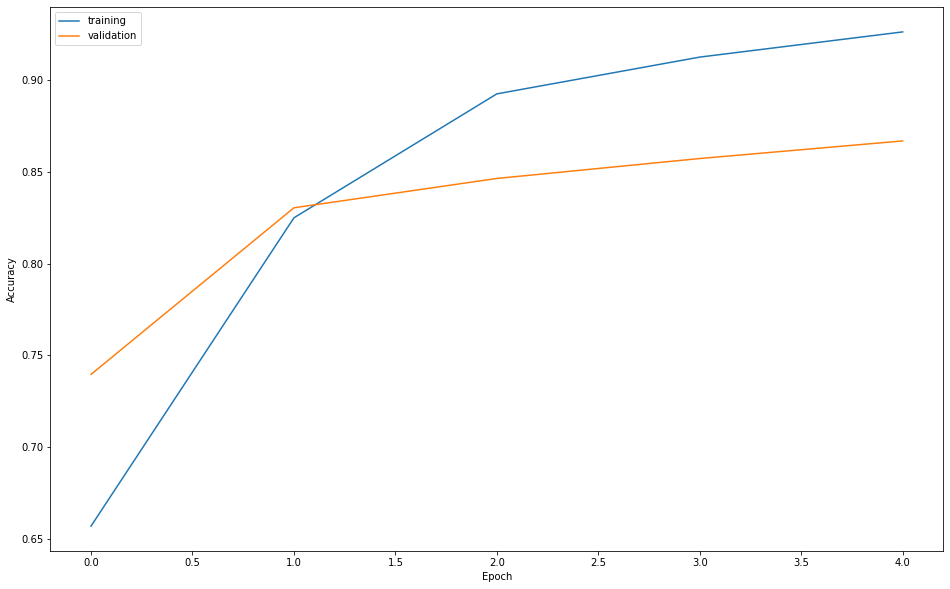

In [76]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()